In [ ]:
import pandas as pd
import numpy as np

In [ ]:
col_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df_msl = pd.read_csv('Busan_MSL_data_1961_2022_meanx.csv', skiprows=1, names=col_names)
df_msl = df_msl.apply(pd.to_numeric, errors='coerce')
df_msl.dropna(inplace=True)
df_msl.replace({-99.90 : np.NaN}, inplace=True)
df_msl

,January,February,March,April,May,June,July,August,September,October,November,December
1961,61.8,63.9,63.4,67.1,73.4,79.5,76.5,79.0,74.8,71.2,63.8,58.9
1962,58.5,49.6,49.0,51.5,57.7,68.8,73.0,73.0,74.7,68.2,65.9,60.8
1963,57.3,51.4,56.7,54.3,60.0,71.6,69.8,76.2,73.3,62.6,59.7,55.6
1964,58.4,52.3,52.6,54.0,67.2,70.2,67.3,78.0,81.1,68.6,64.0,60.9
1965,58.9,54.4,58.7,50.8,59.5,69.2,69.7,67.6,70.8,61.5,64.6,55.1
...,...,...,...,...,...,...,...,...,...,...,...,...
2018,63.2,58.5,59.5,64.3,75.2,76.9,81.6,89.8,83.7,77.2,69.3,71.9
2019,71.8,65.8,70.7,71.1,75.0,80.9,84.9,88.7,84.7,85.1,71.5,67.5
2020,73.6,70.4,67.9,68.7,77.0,86.8,85.4,81.8,92.0,83.9,68.8,68.8
2021,70.0,69.8,67.4,69.3,77.3,82.1,88.1,96.9,90.1,83.8,70.3,65.2


In [ ]:
pd.options.plotting.backend = "plotly"
fig = df_msl.plot()
fig.show()

In [ ]:
import plotly.express as px

In [ ]:
fig = px.imshow(df_msl.T,
                color_continuous_scale='RdBu_r',
                title='Mean Sea Level Busan',
                labels=dict(x="Year", y="Month", color="MSL"),
                aspect='auto')
fig.show()

In [ ]:
stacked_series = df_msl.stack()

In [ ]:
df_msl_stacked = stacked_series.to_frame()
df_msl_stacked.reset_index(inplace=True)
df_msl_stacked.columns = ['Year', 'Month', 'MSL']

In [ ]:
df_msl_stacked['Date'] = pd.to_datetime(df_msl_stacked['Year'].astype(str) + '-' + df_msl_stacked['Month'].astype(str))
df_msl_stacked['Date'] = df_msl_stacked['Date'].dt.strftime('%Y-%m')
df_msl_stacked.set_index('Date', inplace=True)
df_msl_stacked.drop(['Year', 'Month'], axis=1, inplace=True)
df_msl_stacked

<ipython-input-11-e0b93df44434>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,MSL
Date,
1961-01,61.8
1961-02,63.9
1961-03,63.4
1961-04,67.1
1961-05,73.4
...,...
2022-08,83.1
2022-09,91.8
2022-10,76.9


In [ ]:
fig = px.line(df_msl_stacked, facet_col_spacing = 0.013)
fig.show()

In [ ]:
# Create new columns for negative and positive values
df_msl_stacked['Above 70'] = df_msl_stacked['MSL'].where(df_msl_stacked['MSL'] >= 70)
df_msl_stacked['Below 70'] = df_msl_stacked['MSL'].where(df_msl_stacked['MSL'] < 70)


fig = px.bar(df_msl_stacked, x=df_msl_stacked.index, y=['Above 70', 'Below 70'])
fig.show()

In [ ]:
# 'Below 70' 열을 음수로 조정
df_msl_stacked['Below 70'] = -df_msl_stacked['MSL'].where(df_msl_stacked['MSL'] < 70).fillna(0)

# 'Above 70'의 NaN 값을 0으로 처리
df_msl_stacked['Above 70'] = df_msl_stacked['MSL'].where(df_msl_stacked['MSL'] >= 70).fillna(0)

# 차트 그리기
import plotly.graph_objects as go

# 위로 파동 그리는 그래프 생성
fig = go.Figure()

# 'Above 70' 데이터 추가
fig.add_trace(go.Bar(x=df_msl_stacked.index, y=df_msl_stacked['Above 70'],
                     base=0, # 이 값에서 시작
                     name='Above 70'))

# 'Below 70' 데이터 추가
fig.add_trace(go.Bar(x=df_msl_stacked.index, y=df_msl_stacked['Below 70'],
                     base=0, # 이 값에서 시작
                     name='Below 70'))

# 그래프 레이아웃 설정
fig.update_layout(title='MSL Above and Below 70',
                  xaxis_title='Date',
                  yaxis_title='MSL',
                  barmode='overlay') # 겹쳐진 막대 그래프를 표현

# 그래프 표시
fig.show()

In [ ]:
df_msl_stacked.index = pd.DatetimeIndex(df_msl_stacked.index)
df_msl_stacked = df_msl_stacked.reset_index()
df_msl_stacked['Decade'] = (df_msl_stacked['Date'].dt.year // 10) * 10

fig = px.line(df_msl_stacked, x='Date', y='MSL', color='Decade')
fig.show()

In [ ]:
# Load the libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [ ]:
# ADF 테스트 실행 함수
def adf_test(timeseries):
    print('Results of Augmented Dickey-Fuller Test:')
    dftest = adfuller(timeseries.dropna(), autolag='AIC')  # NaN 값 제거 후 테스트
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)


In [ ]:
# ADF 테스트 실행
adf_test(df_msl_stacked['MSL'])

Results of Augmented Dickey-Fuller Test:
Test Statistic                  -1.406233
p-value                          0.579284
#Lags Used                      19.000000
Number of Observations Used    712.000000
Critical Value (1%)             -3.439568
Critical Value (5%)             -2.865608
Critical Value (10%)            -2.568936
dtype: float64


In [ ]:
# KPSS 테스트 실행 함수
def kpss_test(timeseries):
    print('\nResults of KPSS Test:')
    kpsstest = kpss(timeseries.dropna(), regression='c')  # NaN 값 제거 후 테스트
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic', 'p-value', 'Lags Used'])
    for key, value in kpsstest[3].items():
        kpss_output[f'Critical Value ({key})'] = value
    print(kpss_output)

In [ ]:
# KPSS 테스트 실행
kpss_test(df_msl_stacked['MSL'])


Results of KPSS Test:
Test Statistic            5.078554
p-value                   0.010000
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


<ipython-input-31-f78c89c607e4>:4: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




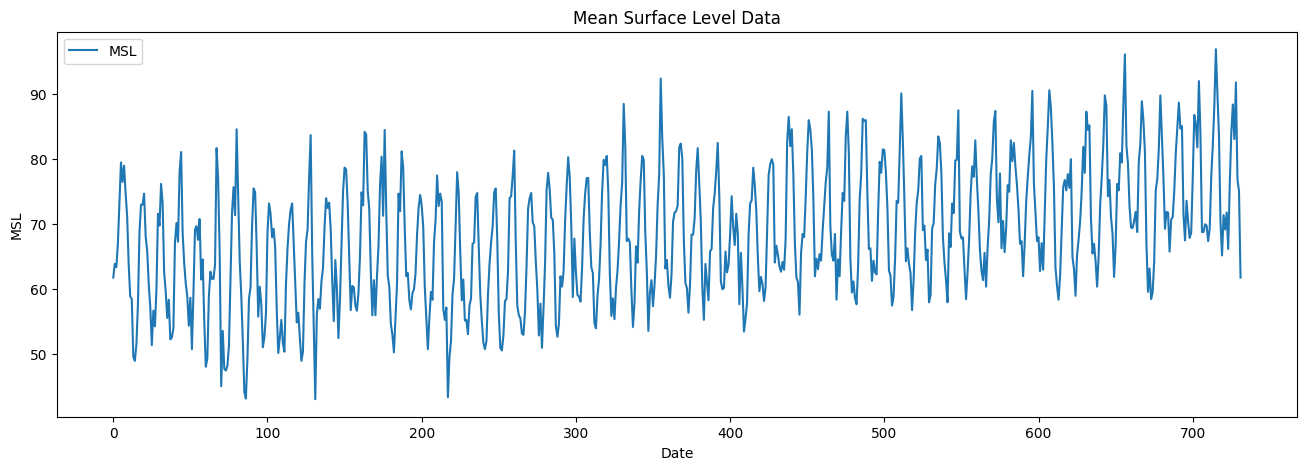

In [ ]:
# 시각화를 위한 데이터 확인
plt.figure(figsize=(16, 5))
plt.plot(df_msl_stacked.index, df_msl_stacked['MSL'], label="MSL")
plt.legend(loc='best')
plt.title("Mean Surface Level Data")
plt.xlabel("Date")
plt.ylabel("MSL")
plt.show()

In [ ]:
df_msl_melted = df_msl.copy()

df_msl_melted.reset_index(inplace=True)
df_msl_melted = df_msl_melted.melt(id_vars='index', var_name='Month', value_name='Value')
df_msl_melted['Month'] = pd.to_datetime(df_msl_melted['Month'], format='%B').dt.month
df_msl_melted = df_msl_melted.rename(columns={'index': 'Year', 'Value':'MSL'})
df_msl_melted = df_msl_melted.sort_values(['Year', 'Month'])
df_msl_melted = df_msl_melted.reset_index().drop(['index'], axis=1)
df_msl_melted['Date'] = pd.to_datetime(df_msl_melted['Year'].astype(str) + '-' + df_msl_melted['Month'].astype(str))
df_msl_melted['Date'] = pd.to_datetime(df_msl_melted['Date'].dt.strftime('%Y-%m'))
df_msl_melted['Decade'] = (df_msl_melted['Date'].dt.year // 10) * 10
df_msl_melted.drop(['Date', 'Year'], axis=1, inplace=True)
df_msl_melted

,Month,MSL,Decade
0,1,61.8,1960
1,2,63.9,1960
2,3,63.4,1960
3,4,67.1,1960
4,5,73.4,1960
...,...,...,...
727,8,83.1,2020
728,9,91.8,2020
729,10,76.9,2020
730,11,75.1,2020


In [ ]:
df_msl_monthly = df_msl_melted.groupby(['Decade', 'Month'])['MSL'].mean()
df_msl_monthly = df_msl_monthly.to_frame()
df_msl_monthly.reset_index(inplace=True)

fig = px.line(df_msl_monthly, x='Month', y='MSL', color='Decade')
fig.show()